<a href="https://colab.research.google.com/github/Adityasingh3008/CREDIT-CARD-DEFAULT-PREDICTION/blob/main/Individual_Notebook_Credit_Card_Default_Prediction_(Capstone_Project_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [54]:
# Importing all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Mounting google drive to load our dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Link the dataset path and read csv file
data = '/content/default of credit card clients.xls'

In [1]:
pip install --upgrade xlrd


     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [57]:
 # Use read_excel() function to read the excel file data into a DataFrame object
 dataset = pd.read_excel(data, header=1)

In [58]:
# Loaded excel file
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [60]:
# Fetch first five rows by using head() method of dataframe
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
# Fetch last five rows by using tail() method of dataframe
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [62]:
# Getting information about the datatypes and null values stored at each column by using "info()" method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [63]:
# Access a group of observations and features by their labels
dataset.loc[0]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

**From Above Dataset Documentation:-** 
* PAY_0**[X6]**:- Repayment status in September  2005
* PAY_0**[X7]**:- Repayment status in August  2005
* PAY_0**[X8]**:- Repayment status in July  2005
* PAY_0**[X9]**:- Repayment status in June  2005
* PAY_0**[X10]**:- Repayment status in May  2005
* PAY_0**[X11]**:- Repayment status in April  2005

**Measurement Scale For The Repayment Status:-**
* -1=Pay duly**[Duly mean properly or at right time]**
*  1=Payment delay for one month 
*  2=Payment delay for two months
*  8=Payment delay for eight months
*  9=Payment delay for nine months and above

# **What does 'default.payment.next.month' mean?**
It is basically the actual data that was collected in the next month - Oct 2005. In the Dataframe 'default.payment.next.month' is our dependent feature [Y] and it shows that if **Y=0** i.e.Client is not a defaulter and if **Y=1** then the client is a **defaulter.**

**NOTE:- Defaulter** is a person who defaults or fails to fulfill an obligation, especially a legal or financial one.


In [64]:
# Get the proportion of customers who had default payment in the next month (Oct.2005)? 
dataset['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

* **From above table we can see that there were almost 22% of the defaulters who fail to pay the amount in month October 2005.**

In [65]:
# Sort the repayment status codes of 'PAY_X' features by melting them into 1 column
pay = dataset[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


* **We have used pd.melt() function which unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set. This function is useful to message a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.**
* **Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation.**
* **-2 corresponds to being no credit to pay and 0 corresponds to a payment being made on time but not the total amount to clear the balance. (Another way to think about this is that the minimum payment is met.)**

In [66]:
# Change uncoventional column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NM'
dataset.rename(columns={'PAY_0':'PAY_1','default payment next month':'DEF_PAY_NMO'},inplace = True)
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

# **Check Null Records**

In [67]:
# Checking Null Values In Our Dataset
dataset.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
DEF_PAY_NMO    0
dtype: int64

* **We can see that there are no null values in our dataset.**

In [68]:
# Taking a look at duplicate values
len(dataset[dataset.duplicated()])

0

* **As there were no null values , This dataset also doesn't contain duplicated values at all.**

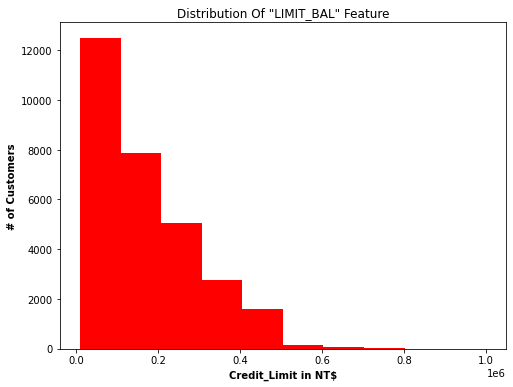

In [69]:
# Use histogram to view the distribution of "LIMIT_BAL" feature
plt.figure(figsize=(8,6))
plt.hist(dataset["LIMIT_BAL"],color='red')
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.title('Distribution Of "LIMIT_BAL" Feature')
plt.show()

**Conclusion Drawn:-**

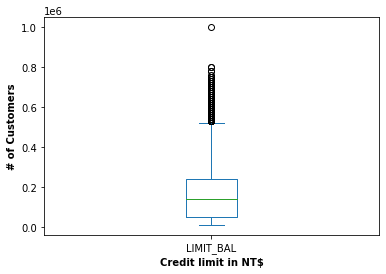

In [70]:
# Use boxplot to identify any outlier in "LIMIT_BAL" feature
dataset["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

**Conclusion Drawn:-**
  * **Take a close look at the outlier the observations from other columns indicate that this was just a customer who has an excellent payment history , therefore it should be considered as a valid data.**

In [71]:
# fetch customers who has excellent payment history using 'LIMIT_BAL' feature
customer = dataset.loc[dataset['LIMIT_BAL']>900000]

In [72]:
customer

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


* **Above dataframe says that the customer whose ID is '2198' has a excellent payment history and he/she is not a defaulter.**

# **Check Numerical Features**

In [73]:
# Analyse the data by looking into various columns i.e. max. , min. , mean etc.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* **We have used describe() method for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.**
* **We have also used a transpose method to convert rows into columns and vice versa.**

# **Check Categorical Features**
* **From the above dataset we get to see that the 'SEX' feature is a binary feature i.e. it consists two values :- MALE , FEMALE and it looks good. But 'EDUCATION' and 'MARRIAGE' have some undocumented data and we also get to know that the 'EDUCATION' feature has duplicated values in our dataset.**

In [74]:
# Fetch the values of binary feature 'SEX' where 1 = Male and 2 = Female
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

* **We can see that there are more number of female customers compared to male customers in our dataset.**

# **Now Take A Look At Another Feature 'EDUCATION' And Its Unique Values**

In [75]:
# EDUCATION:- (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
dataset['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

* **'EDUCATION' feature:- Notice 5 and 6 are both recorded as 'unknown' and there is 0 which is undocumented in our dataset description.**


In [76]:
# Fetch total counts of each EDUCATION level
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* **Using the value_counts() method we get to know that the majority EDUCATION Level in our dataset is University level customers.**

In [77]:
# Change values 4, 5, 6 and replace it to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others
dataset['EDUCATION'] = dataset['EDUCATION'].replace({4:0,5:0,6:0})
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [78]:
# From dataset description:- MARRIAGE:- Marital status (1=married, 2=single, 3=others), but there is also 0

dataset['MARRIAGE'].unique()

array([1, 2, 3, 0])

* **'MARRIAGE' column: what does 0 mean in 'MARRIAGE'? Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.**

In [79]:
# How many customers had "MARRIAGE" status as 0?

dataset['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [80]:
# Combine 0 and 3 by changing the value 0 with 3
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({0:3})
dataset['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

# **Trends, Hypothesis and Findings**

In [81]:
# Set ID as dataframe index

dataset.set_index('ID', inplace = True)
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [82]:
# Create a new column 'HAS_DEF' to indicate customers who have at least 1 default payment from PAY_1 to Pay_6 where 0 : Not a defaulter and 1: Has defaulter
def_condition = (dataset['PAY_1'] >1) | (dataset['PAY_2'] >1) | (dataset['PAY_3'] >1) | (dataset['PAY_4'] >1) | (dataset['PAY_5'] >1) | (dataset['PAY_6'] >1)
dataset.loc[def_condition, 'HAS_DEF'] = 1
dataset.loc[dataset.HAS_DEF.isna(), 'HAS_DEF'] = 0
print(def_condition)

ID
1         True
2         True
3        False
4        False
5        False
         ...  
29996    False
29997    False
29998     True
29999    False
30000    False
Length: 30000, dtype: bool
